# Occlusion sensitivity of the sub_model

Sources:  
https://github.com/BUPTLdy/occlusion_experiments/blob/master/Occlusion_experiments.ipynb  
https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py  
https://github.com/matheushent/covid-19-detector/blob/master/vis.py  
https://pypi.org/project/tf-explain/0.0.1a0/  
https://www.mdpi.com/1424-8220/20/11/3307

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

import keras

import tensorflow as tf


2024-04-10 12:38:01.931291: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 12:38:02.190181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 12:38:03.614127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 12:38:06.689698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def set_reproducible():
    np.random.seed(12345)
    random.seed(12345)
    tf.random.set_seed(12345)
    
set_reproducible()

In [3]:
dps1200 = pd.read_csv("/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/dps1200.csv")

In [4]:
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)

In [5]:
y = dps1200.iloc[:,4:]
xp = y.columns.values
xp = xp.astype(int)

In [6]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
print(test_data.shape)

(258, 410)


In [9]:
model_path = "/home/mel/Masterthesis/Masterthesis_code/code/sub_data/dps1200sub_model.keras"

In [10]:
dps1200sub_model = tf.keras.models.load_model(model_path)

# Show the model architecture
dps1200sub_model.summary()

2024-04-10 12:38:10.165626: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14594580 exceeds 10% of free system memory.
2024-04-10 12:38:10.187427: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14594580 exceeds 10% of free system memory.
2024-04-10 12:38:10.201097: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14594580 exceeds 10% of free system memory.
2024-04-10 12:38:10.362987: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14594580 exceeds 10% of free system memory.
2024-04-10 12:38:10.369012: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14594580 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 410, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 366, 55)        │         2,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 331, 43)        │        85,183 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 331, 63)        │         2,772 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 165, 63)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10395)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10395)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 351)            │     3,648,996 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 351)            │       123,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 351)            │       123,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,960,813 (45.63 MB)

 Trainable params: 3,986,937 (15.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,973,876 (30.42 MB)

In [11]:
print(type(dps1200sub_model))

<class 'keras.src.models.sequential.Sequential'>


# Occlusion

In [12]:
import math
import seaborn as sns
import copy

## Feature importance for each sample

258 82
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9/9 ━

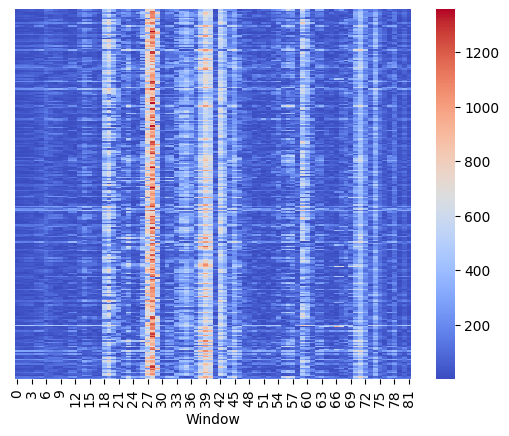

In [13]:
occluding_size = 5
num_columns = test_data.shape[1]
step = occluding_size

output_height = test_data.shape[0]
output_width = math.ceil(num_columns/occluding_size)
print(output_height,output_width)

heatmap = np.zeros((output_height, output_width))
i = 0

for window in range(0, num_columns, step):
   input_data = copy.copy(test_data)
   end_index = min(window + step, num_columns)
   input_data[:, window:end_index] = 0
   output = dps1200sub_model.predict(input_data)
   importance = abs(output.flatten() - test_labels)
   heatmap[:, i] += importance
   i += 1

ax = sns.heatmap(heatmap, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.show()
    

## Feature importance for sorted samples

In [14]:
test_labels_2d = test_labels.reshape(-1, 1)
test_all = np.concatenate((test_labels_2d, test_data), axis=1)


sorted_indices = np.argsort(test_all[:, 0])
test_all_sorted = test_all[sorted_indices]

sorted_test_labels = test_all_sorted[:, 0]
sorted_test_data = test_all_sorted[:, 1:]

print("Sortierte Labels:")
print(sorted_test_labels)
print("\nSortierte Daten:")
print(sorted_test_data)

Sortierte Labels:
[1206. 1244. 1249. 1254. 1254. 1261. 1271. 1273. 1276. 1281. 1311. 1326.
 1345. 1369. 1372. 1377. 1378. 1379. 1389. 1397. 1398. 1402. 1406. 1416.
 1419. 1424. 1426. 1433. 1436. 1436. 1444. 1444. 1446. 1449. 1450. 1453.
 1454. 1461. 1468. 1471. 1481. 1484. 1491. 1492. 1493. 1517. 1530. 1535.
 1546. 1546. 1548. 1551. 1551. 1559. 1561. 1569. 1571. 1572. 1579. 1590.
 1593. 1596. 1598. 1600. 1602. 1607. 1615. 1616. 1618. 1629. 1632. 1635.
 1637. 1640. 1642. 1649. 1650. 1651. 1652. 1659. 1665. 1665. 1666. 1666.
 1667. 1668. 1677. 1678. 1679. 1682. 1682. 1684. 1686. 1687. 1688. 1689.
 1690. 1691. 1692. 1695. 1695. 1700. 1701. 1702. 1704. 1707. 1712. 1715.
 1719. 1727. 1730. 1732. 1732. 1735. 1735. 1736. 1739. 1739. 1740. 1742.
 1745. 1749. 1752. 1756. 1761. 1765. 1766. 1769. 1770. 1772. 1773. 1773.
 1774. 1775. 1779. 1780. 1784. 1789. 1792. 1793. 1795. 1795. 1801. 1805.
 1806. 1811. 1815. 1818. 1820. 1822. 1822. 1823. 1826. 1828. 1832. 1833.
 1835. 1836. 1839. 1840. 1841. 18

258 82
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
9/9 ━

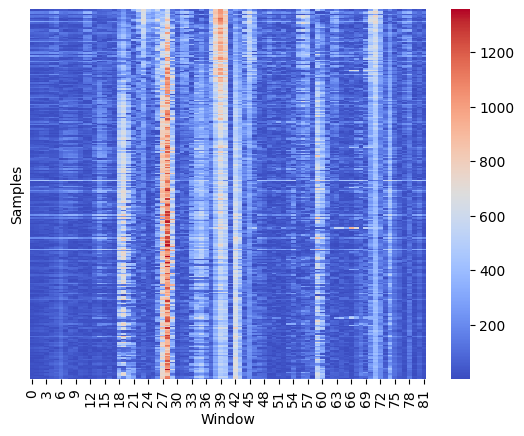

In [15]:
occluding_size = 5
num_columns = sorted_test_data.shape[1]
step = occluding_size

output_height = sorted_test_data.shape[0]
output_width = math.ceil(num_columns/occluding_size)
print(output_height,output_width)

heatmap = np.zeros((output_height, output_width))
i = 0

for window in range(0, num_columns, step):
   input_data = copy.copy(sorted_test_data)
   end_index = min(window + step, num_columns)
   input_data[:, window:end_index] = 0
   output = dps1200sub_model.predict(input_data)
   importance = abs(output.flatten() - sorted_test_labels)
   heatmap[:, i] += importance
   i += 1

ax = sns.heatmap(heatmap, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.ylabel('Samples')
plt.show()

## Feature importance for each century

In [16]:
from typing import List

In [17]:
def convertToCentury(y: List[int]) -> List[int]: 
    return [int(str(year)[:2]) for year in y]
centuries = convertToCentury(sorted_test_labels)

In [18]:
unique_centuries, counts = np.unique(centuries, return_counts=True)
print(unique_centuries, counts)
print(len(counts))

[12 13 14 15 16 17 18 19 20] [10 11 24 18 38 41 44 69  3]
9


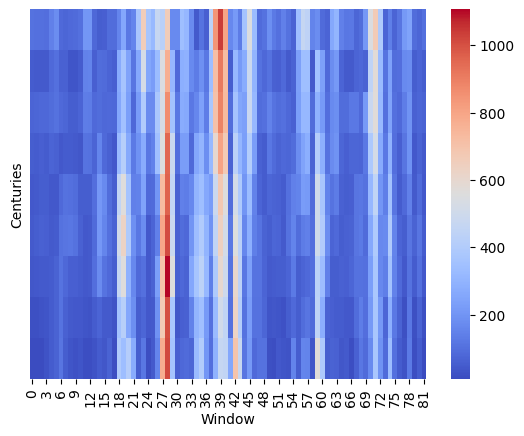

In [19]:
mean_values = []
i = 0
output_height2 = len(counts)
output_width = math.ceil(num_columns/occluding_size)

heatmap2 = np.zeros((output_height2, output_width))

start_row = 0
for count in counts:
    group_data = heatmap[start_row:start_row+count]
    group_mean = np.mean(group_data, axis=0)    
    heatmap2[i,:] += group_mean
    i += 1
    start_row += count

ax = sns.heatmap(heatmap2, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.ylabel('Centuries')
plt.show()

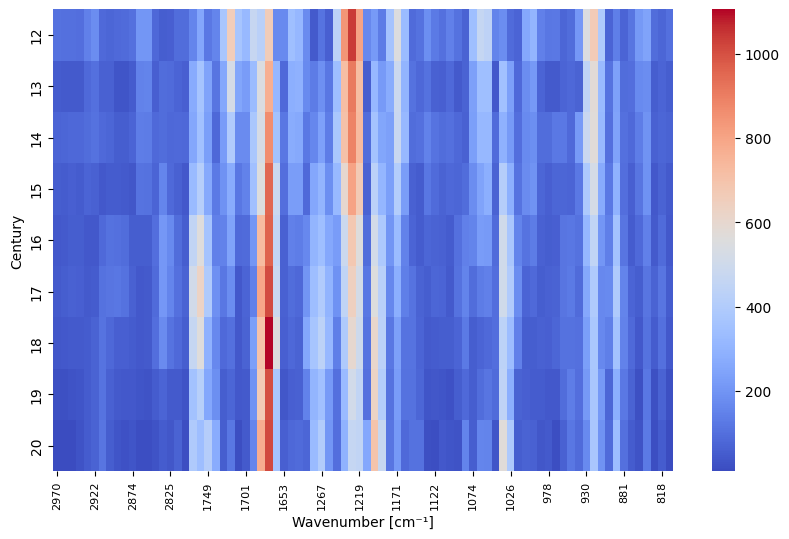

In [ ]:
mean_values = []
i = 0
output_height2 = len(counts)
output_width = math.ceil(num_columns/occluding_size)

heatmap2 = np.zeros((output_height2, output_width))

start_row = 0
for count in counts:
    group_data = heatmap[start_row:start_row+count]
    group_mean = np.mean(group_data, axis=0)    
    heatmap2[i,:] += group_mean
    i += 1
    start_row += count

plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap2, cmap='coolwarm')
wavelengths = xp[::25]
plt.xticks(ticks=np.arange(0.5, heatmap2.shape[1] + 0.5, 5), labels=wavelengths, fontsize=8)
plt.xlabel('Wavenumber [cm⁻¹]')

centuries = unique_centuries
plt.yticks(ticks=np.arange(0.5, heatmap2.shape[0] + 0.5), labels=centuries)
plt.ylabel('Century')
plt.show()

In [22]:
print(heatmap.shape)

(258, 82)


In [48]:
print(xp.shape)

(410,)


# Heatmap for Comparison

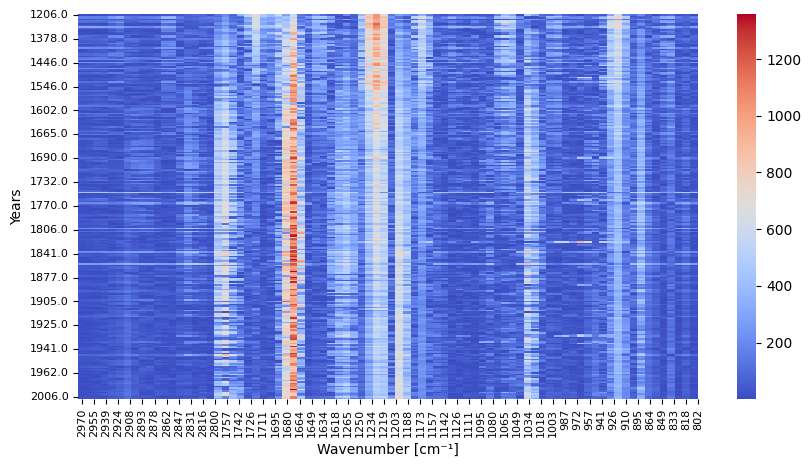

In [ ]:
# Plot Heatmap
wavelengths = xp[::8]
years = sorted_test_labels[::16]

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap, cmap='coolwarm')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Years')
plt.xticks(ticks=np.arange(0.5, heatmap.shape[1] + 0.5, 1.6), labels=wavelengths, fontsize=8)
plt.yticks(ticks=np.arange(0.5, heatmap.shape[0] + 0.5, 16), labels=years, fontsize=8)
plt.show()